<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>
# <center>Analyse de la régression non linéaire</center>

Si les données montrent une tendance courbe, la régression linéaire ne produira pas de résultats très précis par rapport à une régression non linéaire car, comme son nom l'indique, la régression linéaire suppose que les données sont linéaires. Apprenons les régressions non linéaires et appliquons un exemple sur python. Dans ce cahier, nous avons ajusté un modèle non linéaire aux points de données correspondant au PIB de la Chine de 1960 à 2014.

Rappelez-vous d'abord comment la régression linéaire peut modéliser un ensemble de données. Il modélise une relation linéaire entre une variable dépendante y et une variable indépendante x. Il y avait une équation simple, de degré 1, par exemple y = 1.08310 * x - 0.25176 comme dans l'exemple suivant


Call:
lm(formula = y1 ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80611 -0.14955 -0.03788  0.26443  0.60554 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.25176    0.30456  -0.827    0.432    
x            1.08310    0.04908  22.066 1.88e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4458 on 8 degrees of freedom
Multiple R-squared:  0.9838,	Adjusted R-squared:  0.9818 
F-statistic: 486.9 on 1 and 8 DF,  p-value: 1.879e-08



Call:
lm(formula = y1 ~ x + x_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64261 -0.22512  0.02171  0.14499  0.63234 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.19788    0.52024   0.380  0.71495   
x            0.85828    0.21727   3.950  0.00553 **
x_2          0.02044    0.01925   1.062  0.32360   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4423 on 7 degrees of freedom
Multiple R-squared:  0.9861,	Adjusted R-squared:  0.9821 
F-statistic: 247.9 on 2 and 7 DF,  p-value: 3.184e-07


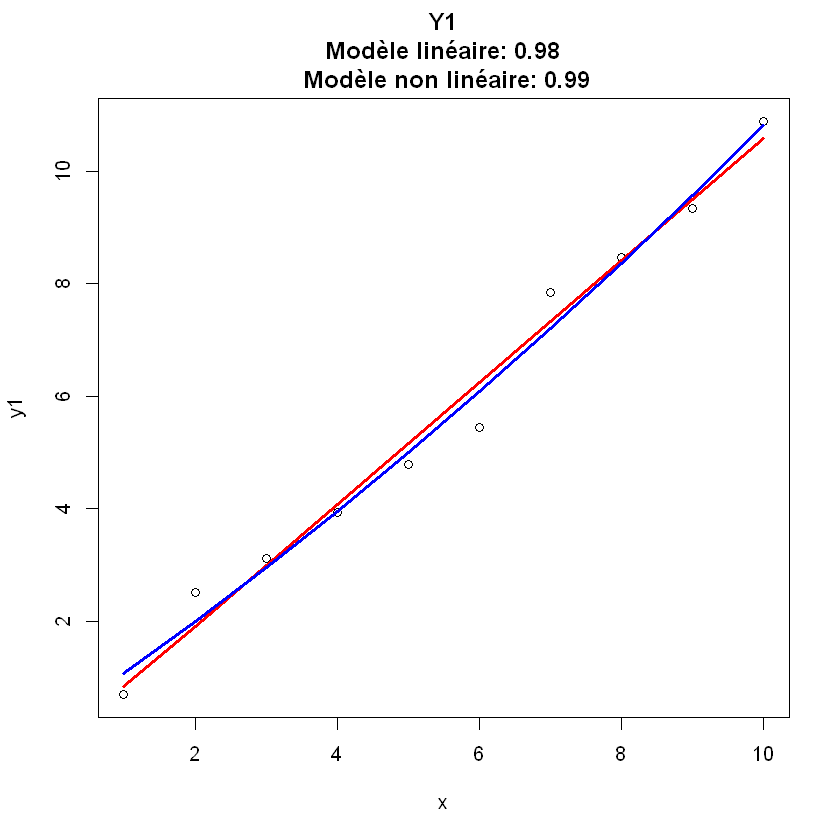

In [1]:
#Création des jeux de données
x=c(1,2,3,4,5,6,7,8,9,10) #valeur de x
y1=c(1,2,3,4,5,6,7,8,9,10) #distribution linéaire
y2=c(0,1,2,3,4,5,5,5,5,5) #croissance puis stagnation
y3=c(0,1,2,3,4,5,4,3,2,1) #croissance sommet décroissance, soit parabolique
y4=c(0,1,1,1,2,2,6,8,9,10) #non croissance puis croissance rapide

#On crée un bruit
bruit <- rnorm(length(x), mean=0, sd=.5)

#On ajoute le bruit à chacune des distributions de y
y1=y1+bruit
y2=y2+bruit
y3=y3+bruit
y4=y4+bruit
#y5=y5+bruit

#On crée une nouvelle variable qui n'est que le x au carré et qui s'ajoutera aux régressions pour produire des modèles non linéaires.
x_2 <- x^2

#On crée un ensemble de quatre graphiques

#Premier cas
modeleLineaire = lm(y1 ~ x)
modeleNonLineaire = lm(y1 ~ x + x_2)
summary(modeleLineaire)
summary(modeleNonLineaire)
plot(x,y1, main=paste("Y1\n","Modèle linéaire:" ,round(summary(modeleLineaire)$r.squared,2),
                      "\n Modèle non linéaire:",round(summary(modeleNonLineaire)$r.squared,2)))
lines(x, predict(modeleLineaire),col="red",lwd=3)
lines(x, predict(modeleNonLineaire),col="blue",lwd=3)

Bien que la régression linéaire soit très bonne pour résoudre de nombreux problèmes, elle ne peut pas être utilisée pour tous les ensembles de données.


Call:
lm(formula = y3 ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95487 -0.97656  0.08972  1.05123  1.78244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.4149     0.9800   1.444    0.187
x             0.2346     0.1579   1.485    0.176

Residual standard error: 1.435 on 8 degrees of freedom
Multiple R-squared:  0.2162,	Adjusted R-squared:  0.1182 
F-statistic: 2.206 on 1 and 8 DF,  p-value: 0.1757



Call:
lm(formula = y3 ~ x + x_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50488 -0.29440 -0.03542  0.23954  0.76870 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.30212    0.52471  -4.387  0.00321 ** 
x            2.09313    0.21914   9.552 2.89e-05 ***
x_2         -0.16896    0.01942  -8.702 5.31e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4461 on 7 degrees of freedom
Multiple R-squared:  0.9337,	Adjusted R-squared:  0.9147 
F-statistic: 49.27 on 2 and 7 DF,  p-value: 7.512e-05


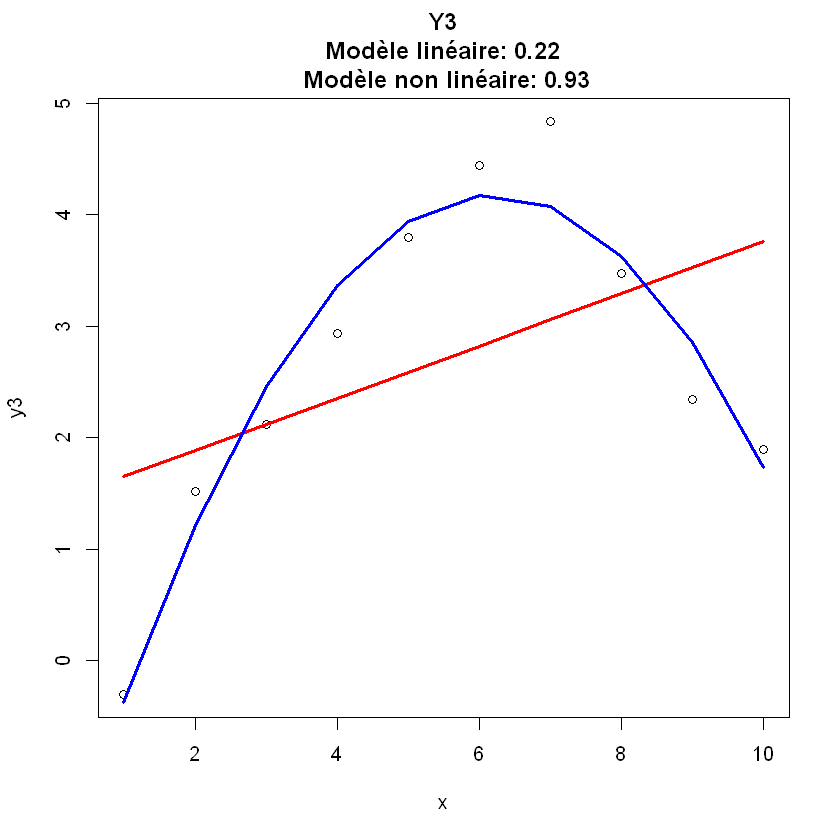

In [2]:
#Troisième cas
modeleLineaire = lm(y3 ~ x)
modeleNonLineaire = lm(y3 ~ x + x_2)
summary(modeleLineaire)
summary(modeleNonLineaire)
plot(x,y3, main=paste("Y3\n","Modèle linéaire:" ,round(summary(modeleLineaire)$r.squared,2),
                      "\n Modèle non linéaire:",round(summary(modeleNonLineaire)$r.squared,2)))
lines(x, predict(modeleLineaire),col="red",lwd=3)
lines(x, predict(modeleNonLineaire),col="blue",lwd=3)

Les régressions non linéaires sont une relation entre des variables indépendantes $ x $ et une variable dépendante $ y $ qui aboutissent à des données modélisées par fonction non linéaire. Essentiellement, toute relation qui n'est pas linéaire peut être qualifiée de non linéaire et est généralement représentée par le polynôme de $ k $ degrés (puissance maximale de $ x $).

$$ \ y = a x ^ 3 + b x ^ 2 + c x + d \ $$


Call:
lm(formula = y3 ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.657 -18.547  -0.961  15.093  63.360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.5385     2.3561   4.473 2.06e-05 ***
x            16.0430     0.8081  19.852  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.68 on 99 degrees of freedom
Multiple R-squared:  0.7992,	Adjusted R-squared:  0.7972 
F-statistic: 394.1 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = y3 ~ x + x_2 + x_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.5570  -7.4935   0.0027   6.9563  25.4101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.87836    1.55108   1.856   0.0665 .  
x            0.33973    0.88693   0.383   0.7025    
x_2          0.90119    0.13602   6.625 1.94e-09 ***
x_3          1.02649    0.05314  19.317  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.39 on 97 degrees of freedom
Multiple R-squared:  0.9621,	Adjusted R-squared:  0.9609 
F-statistic: 821.1 on 3 and 97 DF,  p-value: < 2.2e-16


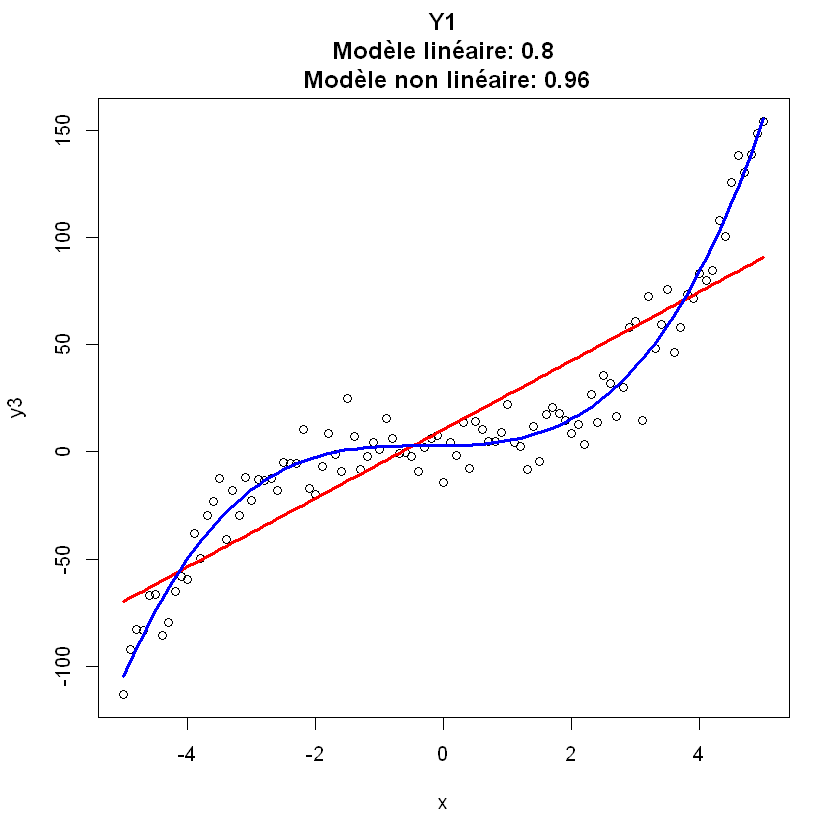

In [7]:
x=seq(from = -5, to = 5, by = 0.1)
y3 = 1*(x^3) + 1*(x^2) + 1*x + 3
bruit <- rnorm(length(x), mean=0, sd=.5)
y3=y3+20*bruit
x_2 <- x^2
x_3 <- x^3
modeleLineaire = lm(y3 ~ x)
modeleNonLineaire = lm(y3 ~ x + x_2 + x_3)
summary(modeleLineaire)
summary(modeleNonLineaire)
plot(x,y3, main=paste("Y1\n","Modèle linéaire:" ,round(summary(modeleLineaire)$r.squared,2),
                      "\n Modèle non linéaire:",round(summary(modeleNonLineaire)$r.squared,2)))
lines(x, predict(modeleLineaire),col="red",lwd=3)
lines(x, predict(modeleNonLineaire),col="blue",lwd=3)

Comme vous pouvez le voir, cette fonction a $ x ^ 3 $ et $ x ^ 2 $ comme variables indépendantes. De plus, le graphique de cette fonction n'est pas une ligne droite sur le plan 2D. C'est donc une fonction non linéaire.

Les fonctions non linéaires peuvent avoir des éléments tels que des exponentielles, des logarithmes, des fractions et autres. Par exemple: $$ y = \ log (x) $$
    
Ou même, plus compliqué comme:
$$ y = \ log (a x ^ 3 + b x ^ 2 + c x + d) $$

Warning message in nls(y ~ a * x/(b + x)):
"No starting values specified for some parameters.
Initializing 'a', 'b' to '1.'.
Consider specifying 'start' or using a selfStart model"

[1] 0.9496598

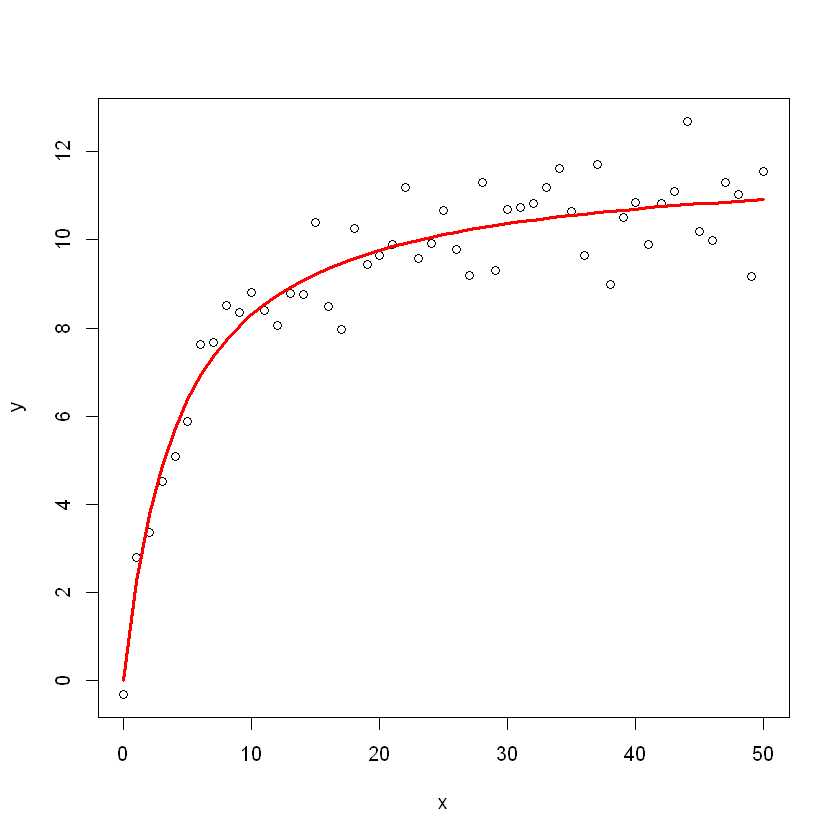

In [8]:
set.seed(20160227)
x<-seq(0,50,1)
y<-((runif(1,10,20)*x)/(runif(1,0,10)+x))+rnorm(51,0,1)
#visually estimate some starting parameter values
plot(x,y)
#for simple models nls find good starting values for the parameters even if it throw a warning
m<-nls(y~a*x/(b+x))
#get some estimation of goodness of fit
cor(y,predict(m))
#plot
plot(x,y)
lines(x,predict(m),col="red",lwd=3)

[1] 0.9811831

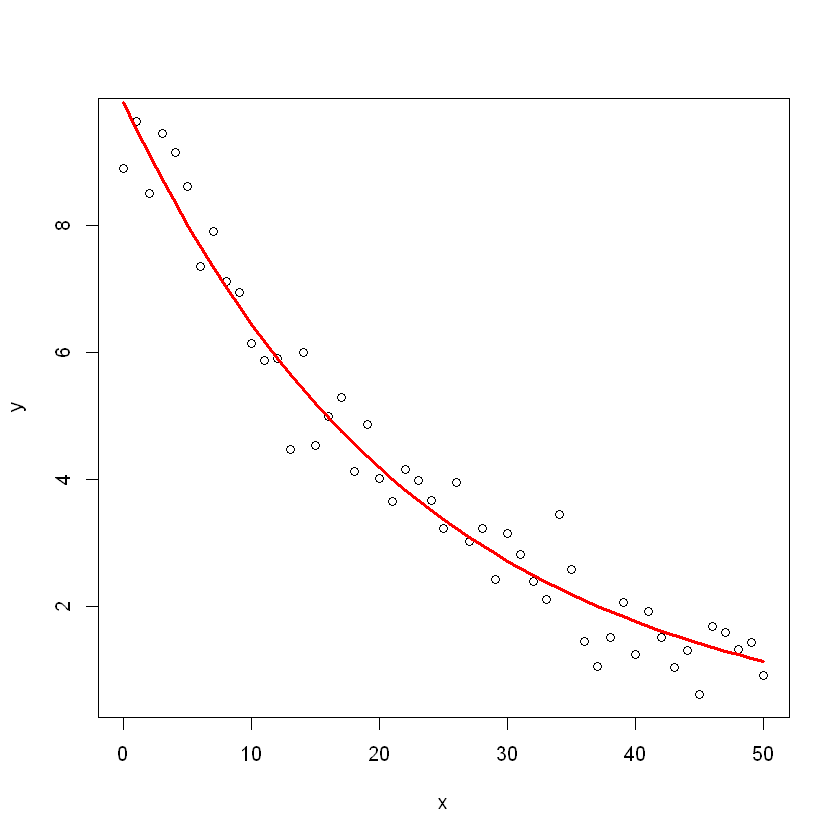

In [9]:
#simulate some data, this without a priori knowledge of the parameter value
y<-runif(1,5,15)*exp(-runif(1,0.01,0.05)*x)+rnorm(51,0,0.5)
#visually estimate some starting parameter values
plot(x,y)
#from this graph set approximate starting values
a_start<-8 #param a is the y value when x=0
b_start<-2*log(2)/a_start #b is the decay rate
#model
m<-nls(y~a*exp(-b*x),start=list(a=a_start,b=b_start))
#get some estimation of goodness of fit
cor(y,predict(m))
#plot the fit
lines(x,predict(m),col="red",lwd=3)

<a id="ref2"> </a>
# Exemple de régression non linéaire

Par exemple, nous allons essayer d'ajuster un modèle non linéaire aux points de données correspondant au PIB de la Chine de 1960 à 2014. Nous téléchargeons un jeu de données avec deux colonnes, la première, une année entre 1960 et 2014, la seconde, Revenu intérieur brut annuel correspondant de la Chine en dollars américains pour cette année.

In [10]:
ChinaGdp <- read.csv(file = "china_gdp.csv")
head(ChinaGdp)

Year,Value
1960,59184116489
1961,49557050183
1962,46685178504
1963,50097303271
1964,59062254890
1965,69709153115


### Tracer l'ensemble de données ###
Voici à quoi ressemblent les points de données. Cela ressemble à une fonction logistique ou exponentielle. La croissance démarre lentement, puis à partir de 2005, la croissance est très significative. Et finalement, il ralentit légèrement dans les années 2010.

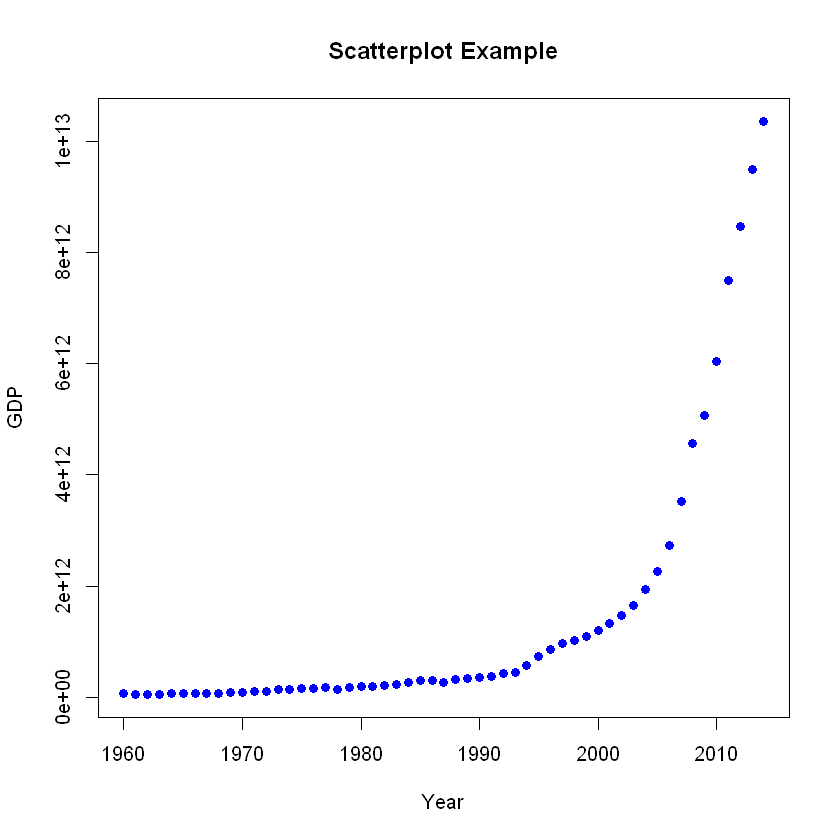

In [11]:
x_data<-ChinaGdp$Year
y_data<-ChinaGdp$Value
plot(x_data, y_data, main="Scatterplot Example",xlab="Year", 
     ylab="GDP", pch=19, col="blue")

### Choisir un modèle ###

À partir d'un premier regard, nous déterminons que la fonction logistique pourrait être une bonne approximation,
car il a la propriété de commencer par une croissance lente, en augmentant la croissance au milieu, puis en diminuant à nouveau à la fin; comme illustré ci-dessous:

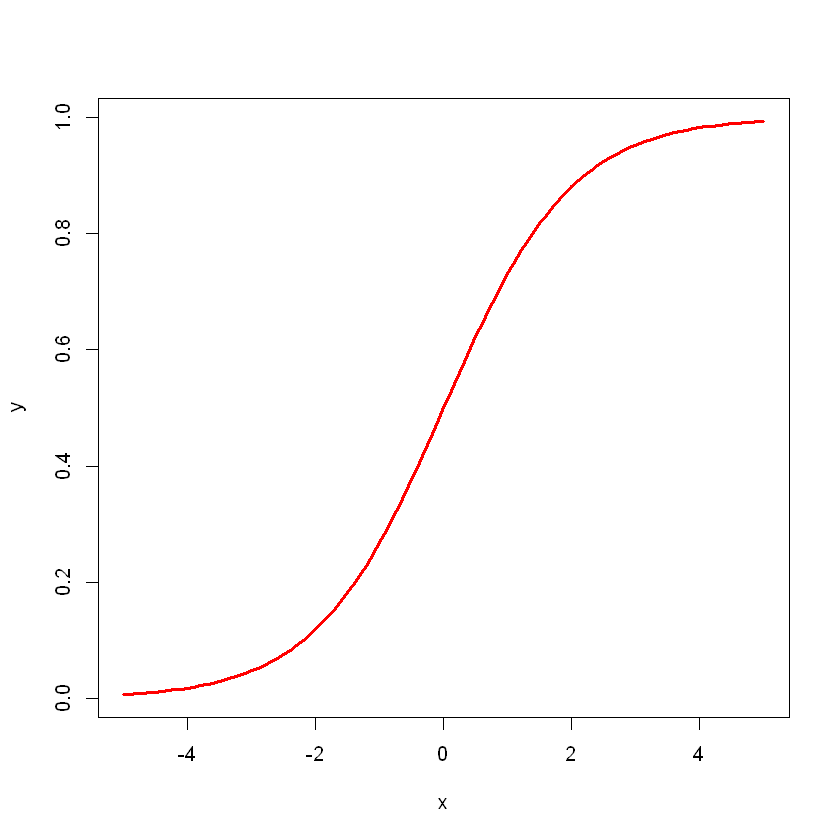

In [18]:
x<-seq(-5.0, 5.0, 0.1)
y<-1/(1+exp(-x))
plot(x,y,"l",col="red",lwd=3)

La formule de la fonction logistique est la suivante:

$$ \hat {Y} = \frac1 {1 + e ^ {\beta_1 (X- \beta_2)}} $$

$ \beta_1 $: contrôle la pente de la courbe,

$ \beta_2 $: fait glisser la courbe sur l'axe des x.

construisons notre modèle de régression et initialisons ses paramètres.

          b           c 
690.4579440   0.9972071 


[1] 0.990328

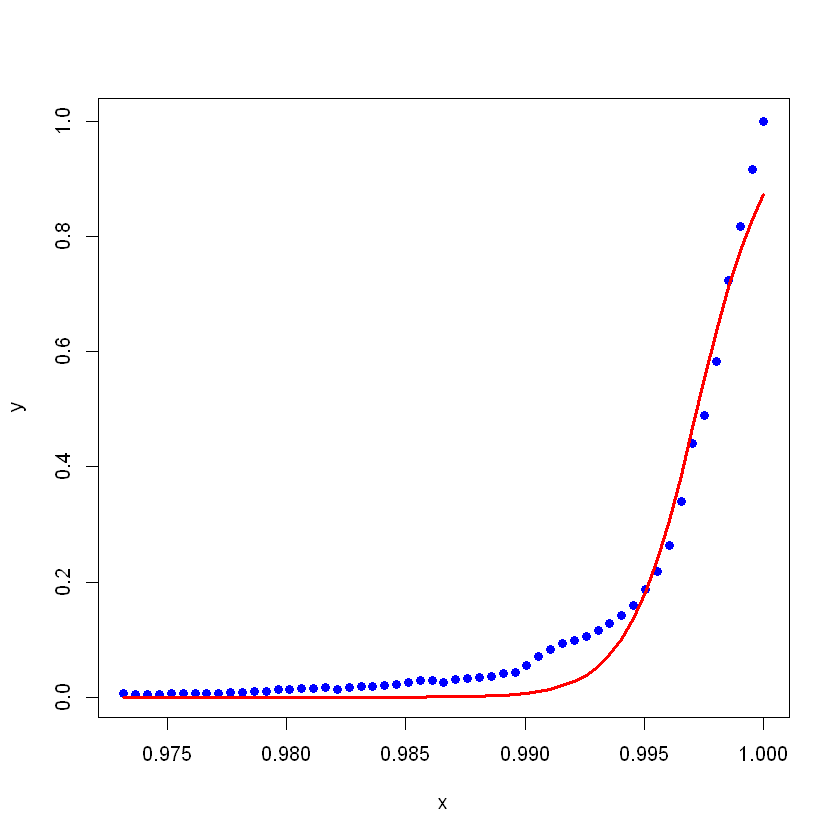

In [20]:
sigmoid = function(params, x) {
  1 / (1 + exp(-params[1] * (x - params[2])))
}
# Lets normalize our data
x =x_data/max(x_data)
y =y_data/max(y_data)
# fitting code
fitmodel <- nls(y~1/(1 + exp(-b * (x-c))),start=list(b=100,c=1))
    
# visualization code
# get the coefficients using the coef function
params=coef(fitmodel)
print(params)
cor(y,predict(fitmodel))
y2 <- sigmoid(params,x)
plot(x,y, pch=19, col="blue")
lines(x,y2, col="red",lwd=3)